<a href="https://colab.research.google.com/github/Shuregg/dsp-labs/blob/lab1-noise-like-signals/Lab1_noise_like_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase:  [1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
C1:  [0, 1, 1, 0, 0, 0, 1, 1, 1]
C2:  [0, 1, 1, 0, 0, 1, 0, 1, 1]


M1  length:  1023
M1  values:  [-1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1,

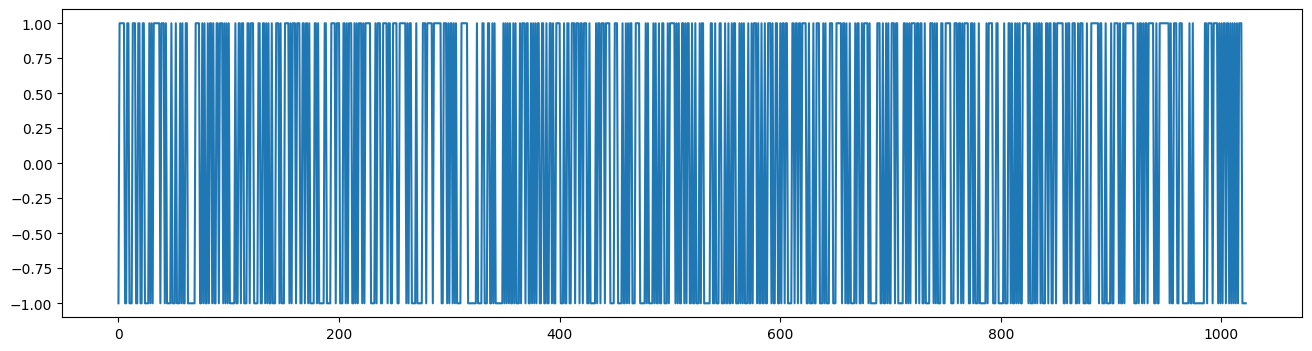



M2  length:  1023
M2  values:  [-1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1,

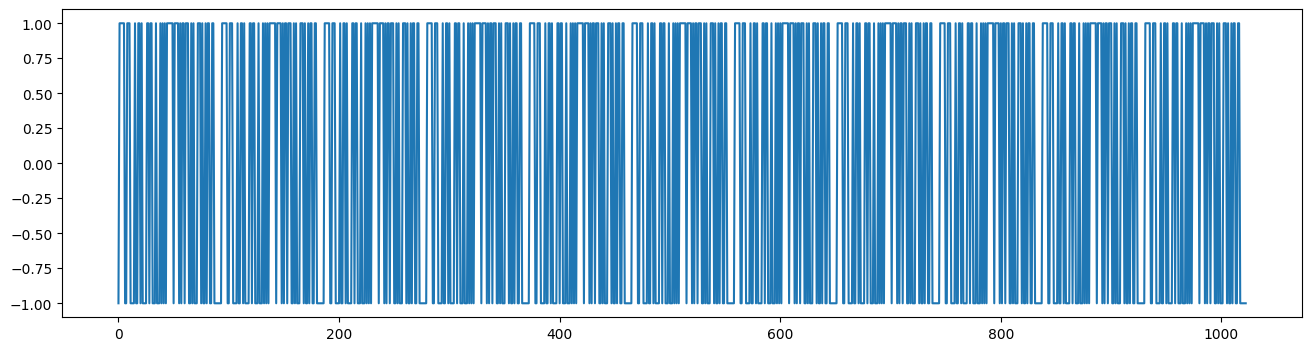



ACF  length:  2045
ACF  values:  [ 1  0 -1 ... -1  0  1]


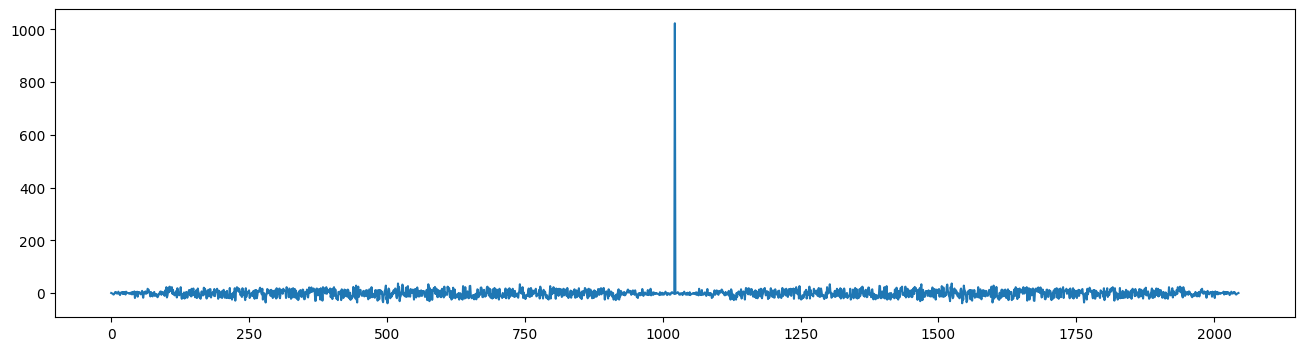



M_sum  length:  1243
M_sum  values:  [-1  1  1 ... -1 -1 -1]


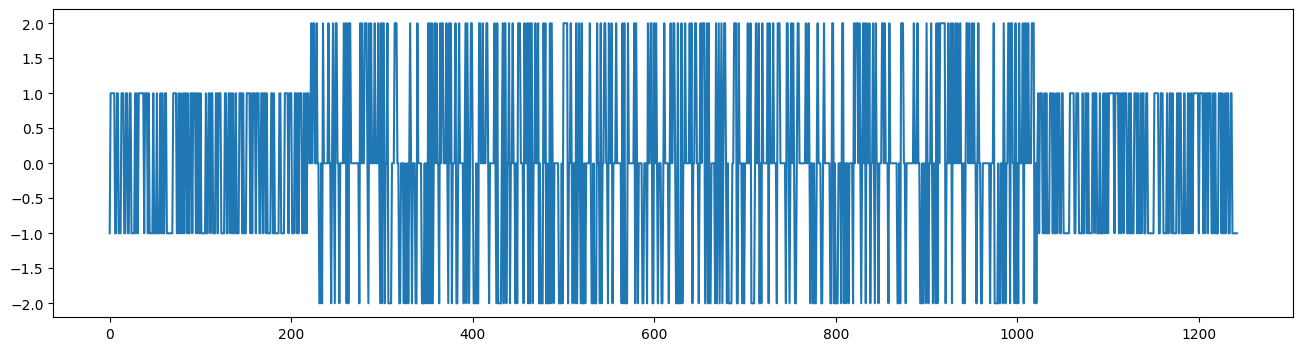



CCF  length:  2045
CCF  values:  [ 1  0 -1 ... -1  0  1]


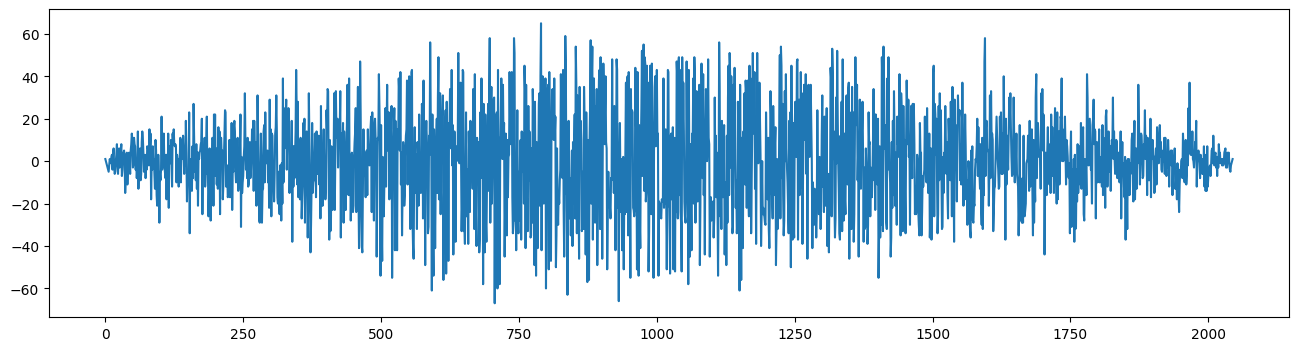



M1 from M_sum  length:  2265
M1 from M_sum  values:  [ 1  0 -1 ... -1  0  1]


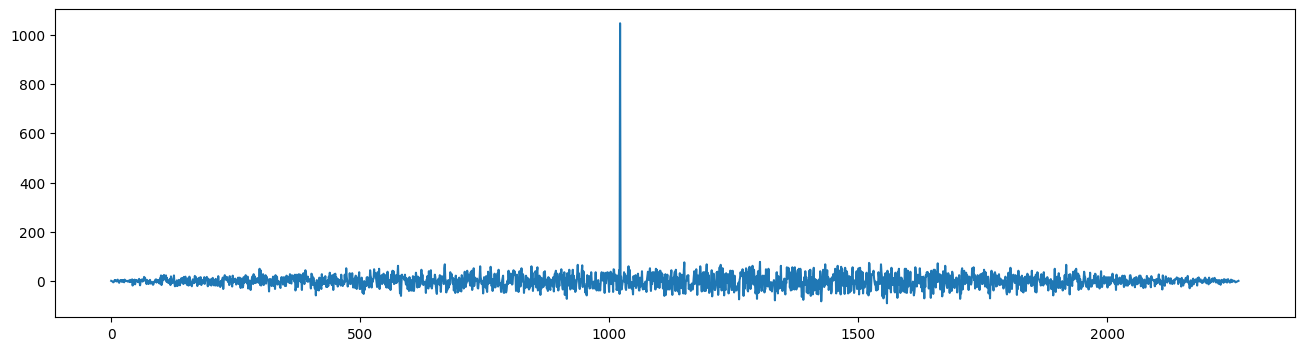



M2 from M_sum  length:  2265
M2 from M_sum  values:  [ 1  0 -1 ... -1  0  1]


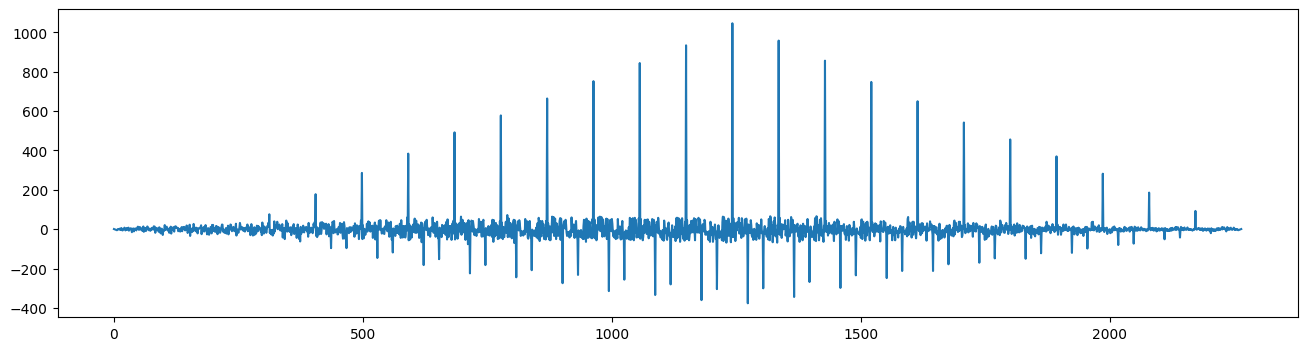

In [31]:
# @title Noise-like signals
# The initial data for the formation M-sequences
# Variant   phase (A)     characteristic polynomial С1            С2
# 12        1000001100                          10110001111    10110010111

import matplotlib.pyplot as plt
import numpy
from scipy.signal import max_len_seq

def inverse_list_bits(bin_list):
  for i in range(0, len(bin_list)):
    if(bin_list[i] == 0):
      bin_list[i] = 1
    elif(bin_list[i] == 1):
      bin_list[i] = 0

def inverse_sign(list_):
    for i in range(0, len(list_)):
      list_[i] = -list_[i]

def indexes_of_specific_value(list_, value_to_check):
  list_of_indexes = []
  for i in range(0, len(list_)):
    if(list_[i] == value_to_check):
      list_of_indexes.append(i)
  return list_of_indexes

def bin_to_neg_lvl(bin_list):
  new_list = []
  for i in range (0, len(bin_list)):
    if(bin_list[i] == 0):
      new_list.append(1)
    elif(bin_list[i] == 1):
      new_list.append(-1)
  return new_list

def print_n_plot_signal(list_, name):
  print("\n")
  print(name, " length: ", len(list_))
  print(name, " values: ", list_)
  fig = plt.figure(figsize=(16, 4))
  plt.plot(list_)
  plt.show()
# =============== The initial data for the formation M-sequences ================
A = [1, 0, 0, 0, 0, 0, 1, 1, 0, 0]            # Phase
C1 = [0, 1, 1, 0, 0, 0, 1, 1, 1]              # Characteristic polynomial C1
C2 = [0, 1, 1, 0, 0, 1, 0, 1, 1]              # Characteristic polynomial C2
variant = 12
N = 10                                        # Number of registers in Linear-feedback shift register
shift = (100+variant*10)

# LFSR # Linear-feedback shift register
print("Phase: ", A)
print("C1: ", C1)
print("C2: ", C2, )

M1 = max_len_seq(nbits=N, state=A, taps=indexes_of_specific_value(C1, 1))
M2 = max_len_seq(nbits=N, state=A, taps=indexes_of_specific_value(C2, 1))

M1_n = bin_to_neg_lvl(M1[0])
M2_n = bin_to_neg_lvl(M2[0])

print_n_plot_signal(M1_n, "M1")
print_n_plot_signal(M2_n, "M2")

ACF = numpy.correlate(M1_n, M1_n, "full") # АКФ
print_n_plot_signal(ACF, "ACF")

M1_sh = M1_n + (shift)*[0]
M2_sh = (shift)*[0] + M2_n

M_sum = numpy.add(M1_sh, M2_sh)
# print(M1_sh)
# print(M2_sh)

print_n_plot_signal(M_sum, "M_sum")

CCF = numpy.correlate(M1_n, M2_n, "full") # ВКФ
print_n_plot_signal(CCF, "CCF")

# 5
M1_from_M_sum = numpy.correlate(M_sum, M1_n, "full") # АКФ
print_n_plot_signal(M1_from_M_sum, "M1 from M_sum")

#6
M2_from_M_sum = numpy.correlate(M_sum, M2_n, "full") # АКФ
print_n_plot_signal(M2_from_M_sum, "M2 from M_sum")

In [23]:
from os import linesep
def inverse(bin_list):
  for i in range(0, len(bin_list)):
    if(bin_list[i] == 0):
      bin_list[i] = 1
    elif(bin_list[i] == 1):
      bin_list[i] = 0

def inverse_sign(bin_list):
    for i in range(0, len(bin_list)):
      bin_list[i] = -bin_list[i]

def indexes_of_specific_value(bin_list, value_to_check):
  list_of_indexes = []
  for i in range(0, len(bin_list)):
    if(bin_list[i] == value_to_check):
      list_of_indexes.append(i)
  return list_of_indexes

b = [1, 0, 1, 1, 0, 0, 0, 1]
c = [0, 1, 1, 0, 0, 0, 1, 1, 1]

# print(b)
# inverse(b)
# print(b)

# inverse_sign(b)
# print(b)

print(c)
c1 = indexes_of_specific_value(c, 1)
print(c1)




[0, 1, 1, 0, 0, 0, 1, 1, 1]
[1, 2, 6, 7, 8]
